<a href="https://colab.research.google.com/github/PutriAngrainiAziz/pembelajaran-mesin/blob/main/fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
fish=pd.read_csv('Fish.csv')

In [16]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [17]:
fish.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [20]:
#memisahkan atribut dngn label
X = fish[['Weight','Length1','Length2','Length3','Height','Width']] #atribut
y = fish['Species'] #label

#membagi data set menjadi data latih dan dta uji
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [21]:
from sklearn.tree import DecisionTreeClassifier

#membuat model decison 3
tree_model = DecisionTreeClassifier()

#melatih model menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [22]:
#evaluasi model

from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy:', acc_score)

Accuracy: 0.875


In [23]:
#prediksi model dengan tree_model

print(tree_model.predict([[865.0, 78.3, 65.2, 82.0,12.5200,5.0200]])[0])

Pike


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
#melihat visulisasi datanya decision tree
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file="fish_eda.dot",
                feature_names=['Weight','Length1','Length2','Length3','Height','Width'],
                class_names=['Bream','Roach','Whitefish','Parkki','Perch','Pike','Smelt'],
                rounded=True,
                filled=True)

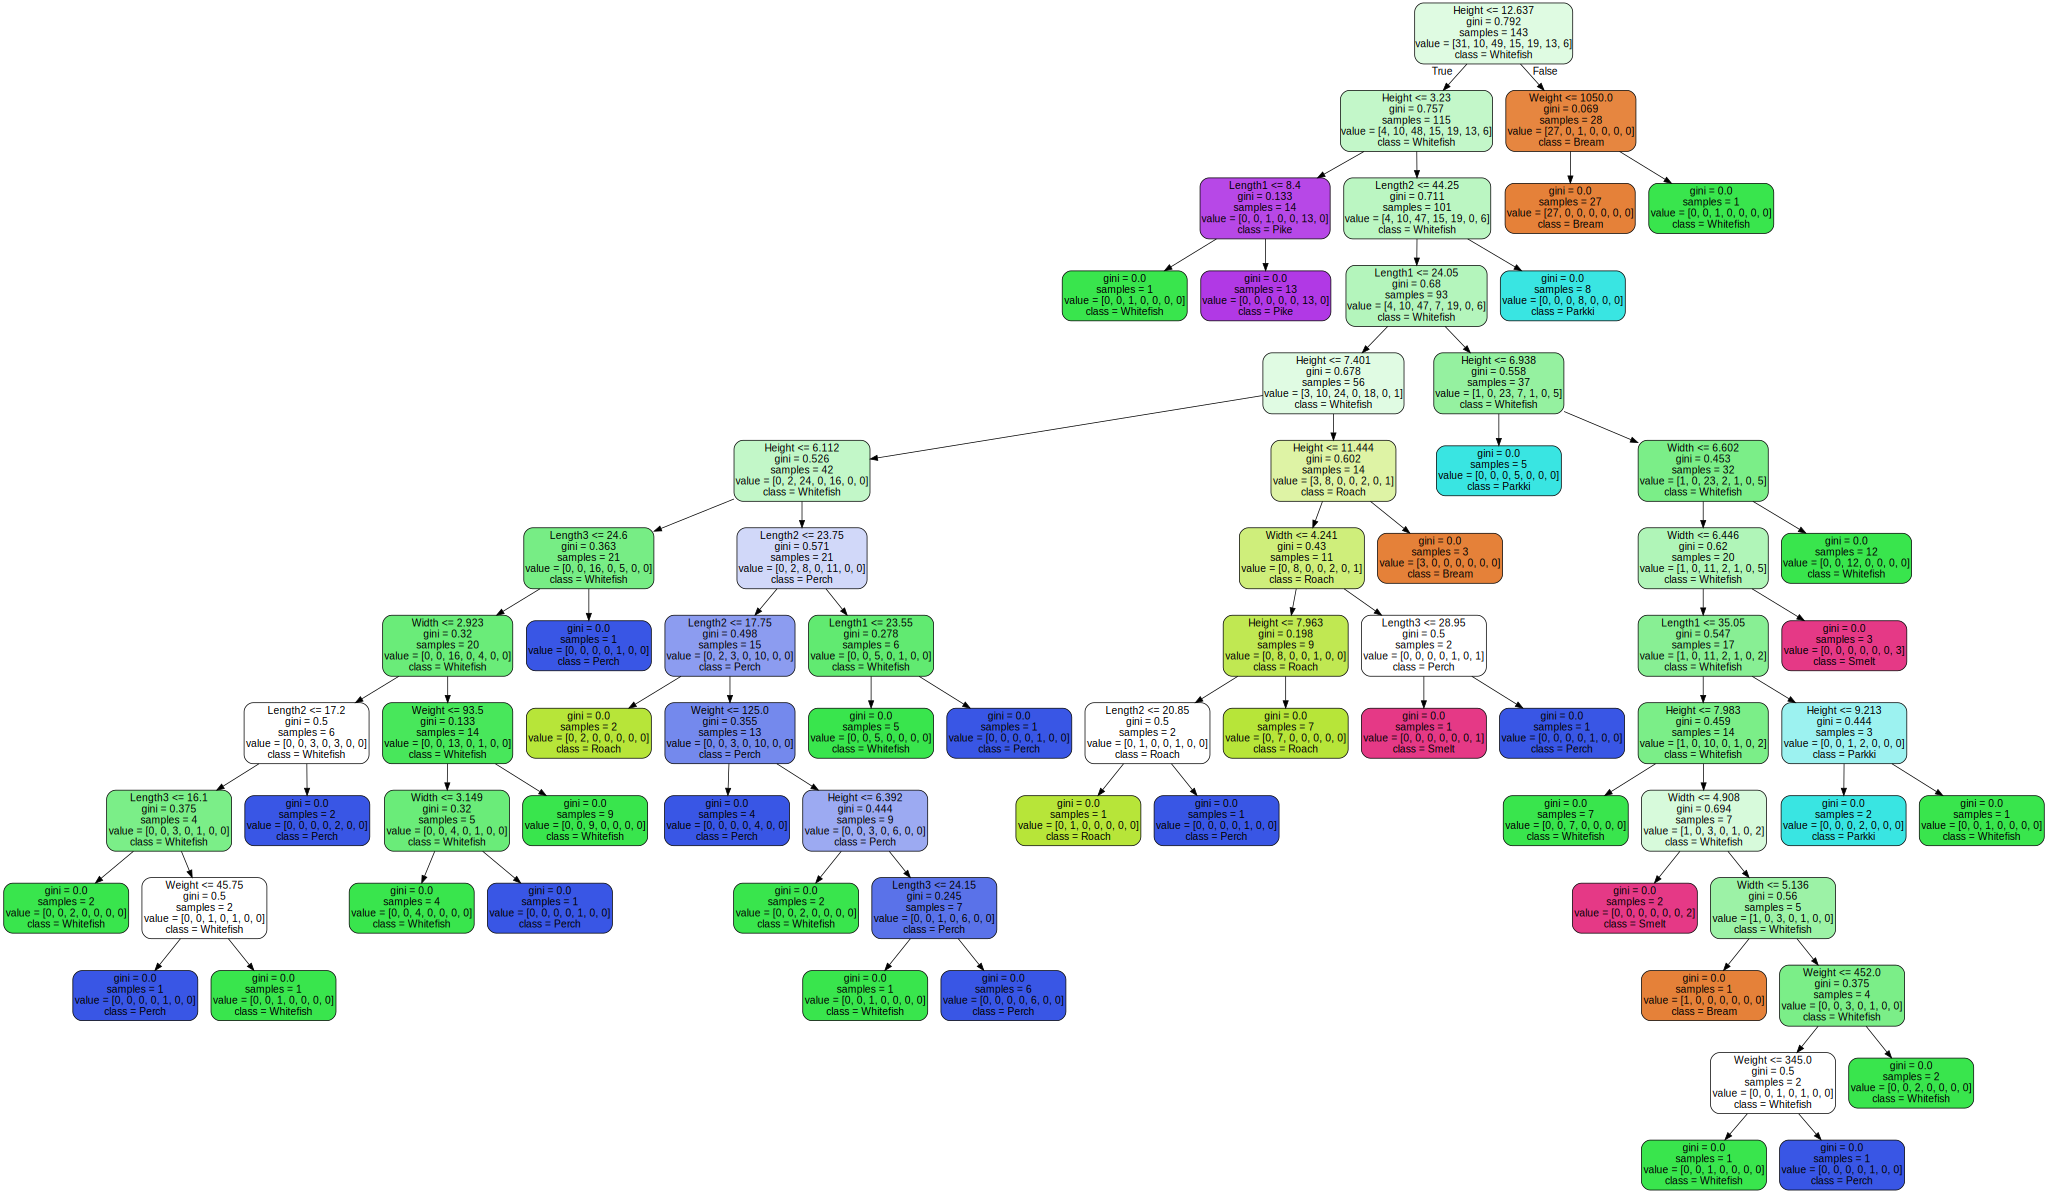

In [25]:
# Konversi file .dot menjadi gambar
import graphviz
with open("fish_eda.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [28]:
# Simpan gambar sebagai file
graph = graphviz.Source(dot_graph)
graph.render(filename='decision_tree', format='png', cleanup=True)

'decision_tree.png'